#Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#Load Data

In [2]:
path = "/content/Chronic_Kidney_Dsease_data.csv"
df = pd.read_csv(path)
df.head(5)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


# Data Preporcessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [4]:
df = df.drop(columns=['PatientID', 'DoctorInCharge'])
#Kolom di drop karena identitas doctor dirahasiakan

In [5]:
df.isna().sum()

,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [6]:
df.duplicated().sum()

0

#EDA

In [7]:
df.describe()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,7.428290,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,9.998927,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


In [8]:
corr = df.corr()['Diagnosis']  # Korelasi setiap kolom dengan 'Diagnosis'

# Memilih fitur hanya kolom dengan korelasi > 0.05 dan tidak negatif. GBT Memiliki kelebihan mampu menangkap hubungan non-linear dan interaksi antar fitur. Jadi, meskipun sebuah fitur memiliki korelasi rendah (misalnya, 0.01), itu tetap dapat berkontribusi jika hubungan non-linear penting.
filtered_corr = corr[corr > 0.05]

feature  = filtered_corr.index
print(feature)

Index(['BMI', 'FamilyHistoryKidneyDisease', 'SystolicBP', 'FastingBloodSugar',
       'HbA1c', 'SerumCreatinine', 'BUNLevels', 'ProteinInUrine', 'Edema',
       'MuscleCramps', 'Itching', 'Diagnosis'],
      dtype='object')


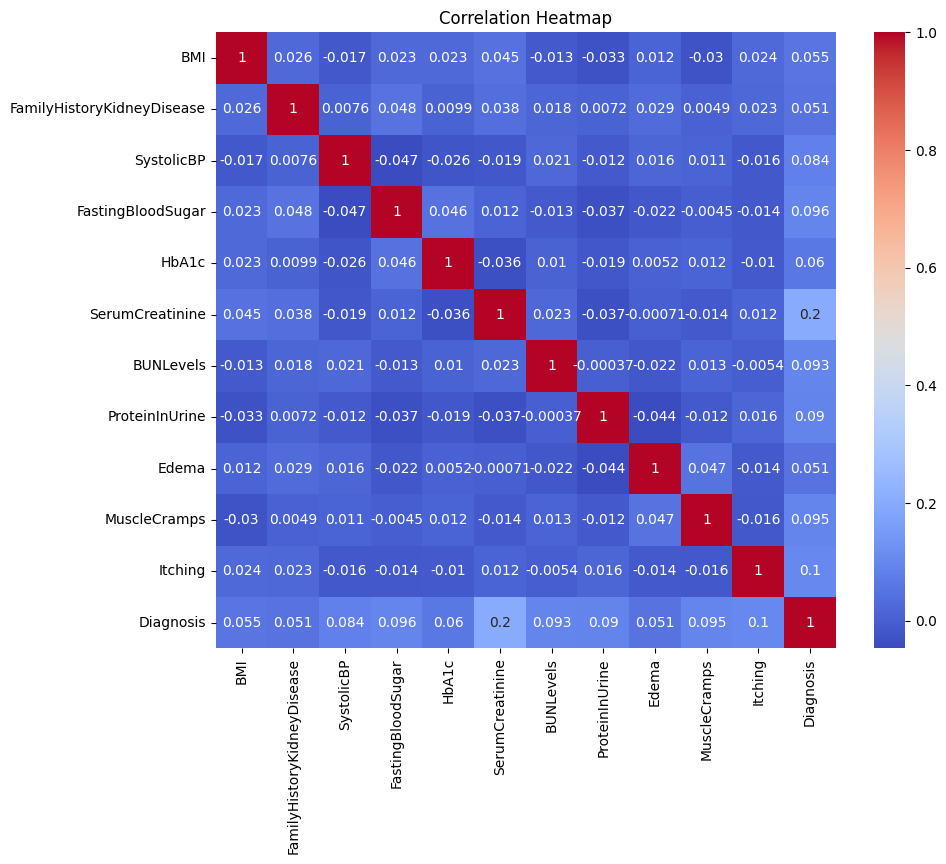

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_heatmap = df[feature].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_heatmap, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

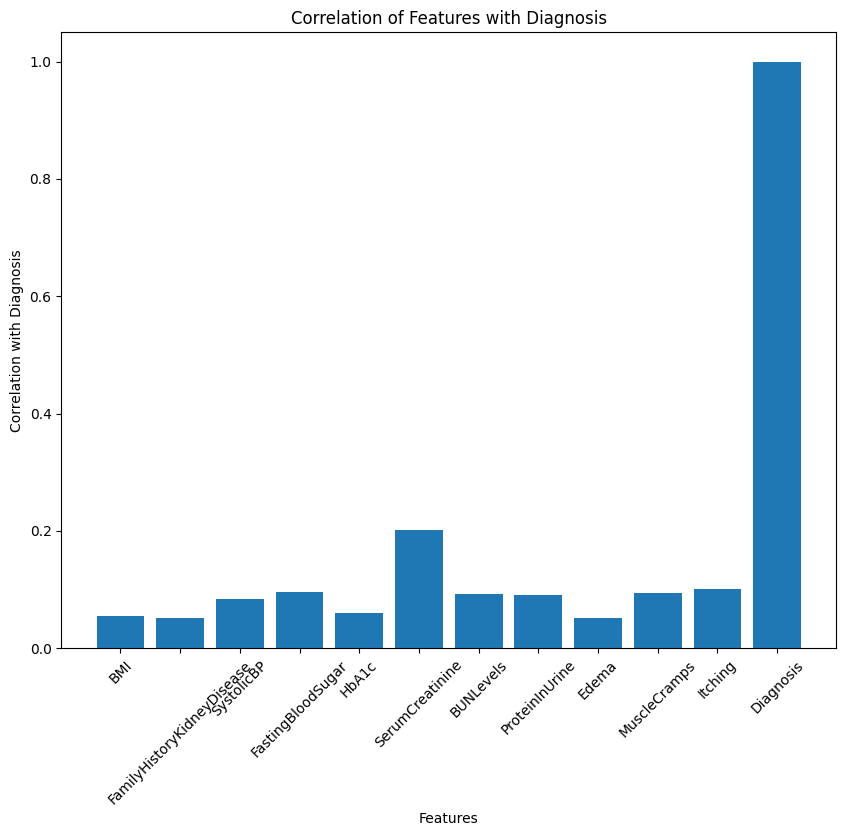

In [37]:
plt.figure(figsize=(10, 8))
plt.bar(filtered_corr.index, filtered_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Diagnosis')
plt.title('Correlation of Features with Diagnosis')
plt.xticks(rotation=45)
plt.show()

# Selection Feature

In [11]:
# Separate features and target
X = df[feature.drop('Diagnosis')]
y = df['Diagnosis']

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split data into training and testing sets
X_train_gbt, X_test_gbt, y_train_gbt, y_test_gbt = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Modeling

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train Gradient Boosting Classifier
gbt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbt_model.fit(X_train_gbt, y_train_gbt)


GradientBoostingClassifier(random_state=42)

In [20]:
import h5py
import joblib

# Tentukan path penyimpanan file
model_path = '/content/gradient_boosting_model.h5'
joblib.dump(gbt_model, model_path)

print(f"Model telah disimpan di {model_path}")

Model telah disimpan di /content/gradient_boosting_model.h5


#Analisa Model

In [21]:
# Make predictions
y_pred_gbt = gbt_model.predict(X_test_gbt)

# Evaluate the model
accuracy = accuracy_score(y_test_gbt, y_pred_gbt)
conf_matrix_gbt = confusion_matrix(y_test_gbt, y_pred_gbt)
report = classification_report(y_test_gbt, y_pred_gbt)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.9246987951807228

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.17      0.24        24
           1       0.94      0.98      0.96       308

    accuracy                           0.92       332
   macro avg       0.69      0.58      0.60       332
weighted avg       0.90      0.92      0.91       332



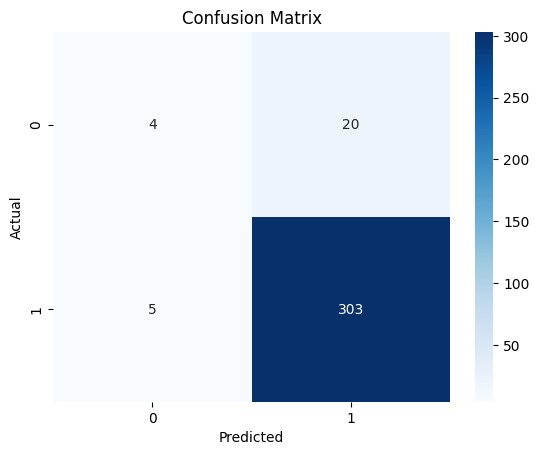

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix_gbt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Kesimpulan dan Analisis

Penelitian ini berhasil mengembangkan model prediksi Chronic Kidney Disease (CKD)
menggunakan algoritma Gradient Boost Tree (GBT), yang menunjukkan akurasi tinggi sebesar
92.46%. Hal ini membuktikan bahwa GBT mampu menangkap pola-pola penting dalam data
medis dengan baik, khususnya dalam mendeteksi kelas mayoritas (positif CKD). Namun, hasil
evaluasi juga menunjukkan kelemahan model dalam mendeteksi kelas minoritas (negatif
CKD), yang terlihat dari nilai recall yang rendah pada kelas tersebut, yaitu 0.17, serta F1-score
sebesar 0.24. Kendala ini terutama disebabkan oleh ketidakseimbangan data, di mana jumlah
sampel positif jauh lebih banyak dibandingkan dengan sampel negatif. Untuk mengatasi
masalah ini, perlu dilakukan langkah perbaikan seperti penanganan ketidakseimbangan data
menggunakan teknik oversampling atau undersampling, serta tuning hyperparameter untuk
meningkatkan sensitivitas model terhadap kelas minoritas. Meskipun demikian, model ini
memberikan fondasi yang kuat untuk sistem prediksi CKD dan dapat dioptimalkan lebih lanjut
untuk mendukung pengambilan keputusan klinis yang lebih baik.